In [1]:
!pip install kaggle
!pip install transformers torchaudio librosa noisereduce
!pip install openai-whisper  # Optional if you choose Whisper


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


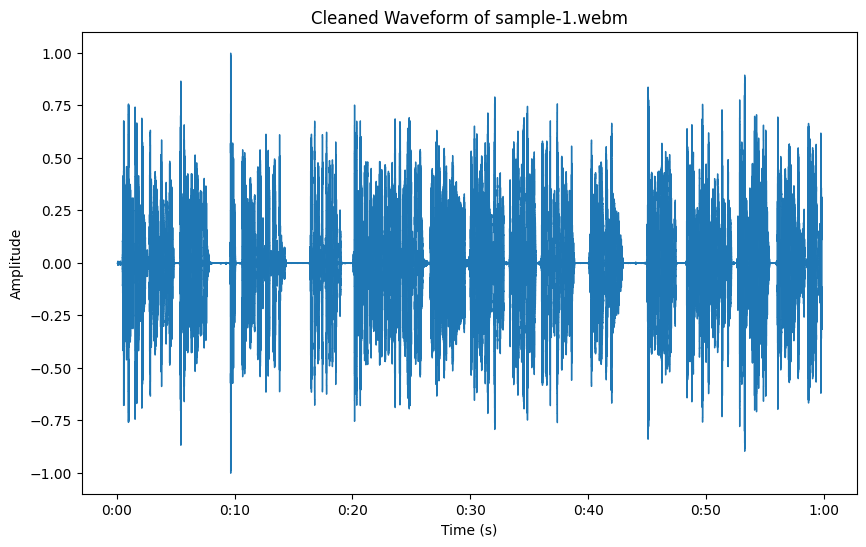

In [ ]:
#DATA CLEANING
#This will:
#Load the audio file.
#Remove silence (if any).
#Normalize the audio to bring it within the appropriate dynamic range.
import librosa
import numpy as np

# Load the audio file
audio_path = '/content/Speaker26_000.wav'  # Replace with the correct path
y, sr = librosa.load(audio_path, sr=None)

# Remove silence using librosa's effect module
y_clean, _ = librosa.effects.trim(y)

# Normalize the audio signal
y_normalized = librosa.util.normalize(y_clean)

# Plot the cleaned waveform
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(10, 6))
librosa.display.waveshow(y_normalized, sr=sr)
plt.title('Cleaned Waveform of sample-1.webm')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

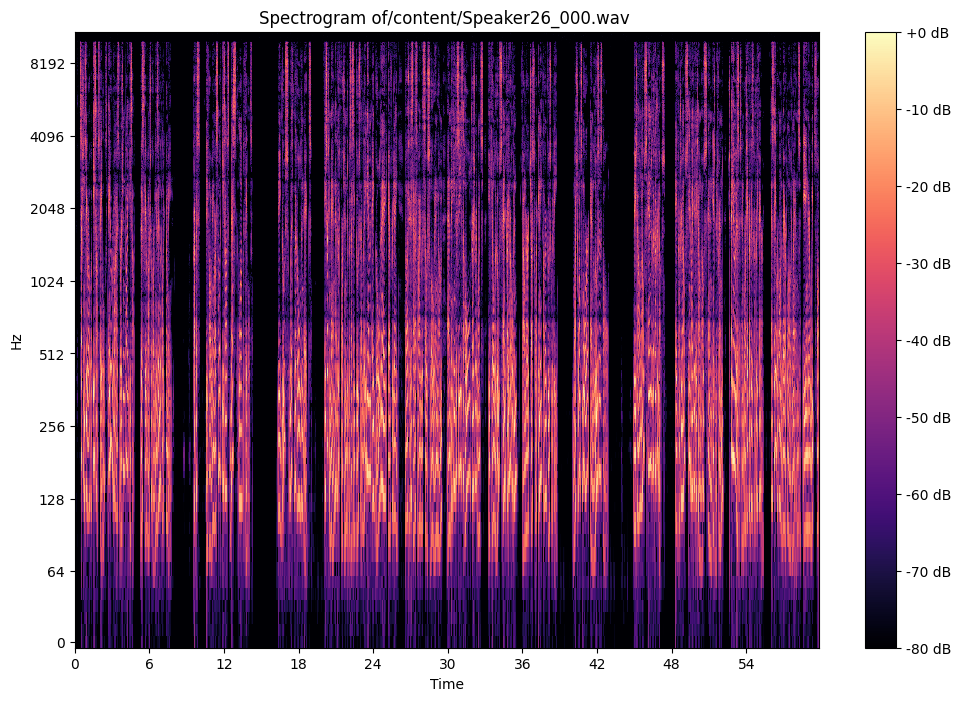

In [ ]:
#MODULE 2 - Data Analysis
#We will analyze the distribution of accents and identify any misclassifications.
#For simplicity, we'll focus on visualizing the spectrogram (which can reveal noise and distortion) and perform basic classification error analysis.
import librosa.display

# Plot the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y_normalized)), ref=np.max)

plt.figure(figsize=(12, 8))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of/content/Speaker26_000.wav ')
plt.show()


In [ ]:
#Module 3: Visualization Tools
#Word Error Rate (WER): This will measure how well a speech-to-text model performs. You can calculate it using jiwer.

#Calculate WER:
#To calculate WER, we can use jiwer (a Python package for measuring speech recognition accuracy).
!pip install jiwer
from jiwer import wer

# Assume 'predicted_transcription' and 'actual_transcription' are available
actual_transcription = "your actual transcription here"
predicted_transcription = "your predicted transcription here"

# Compute WER
wer_score = wer(actual_transcription, predicted_transcription)
print(f"Word Error Rate (WER): {wer_score}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.3 MB/s eta 0:00:00
Word Error Rate (WER): 0.25


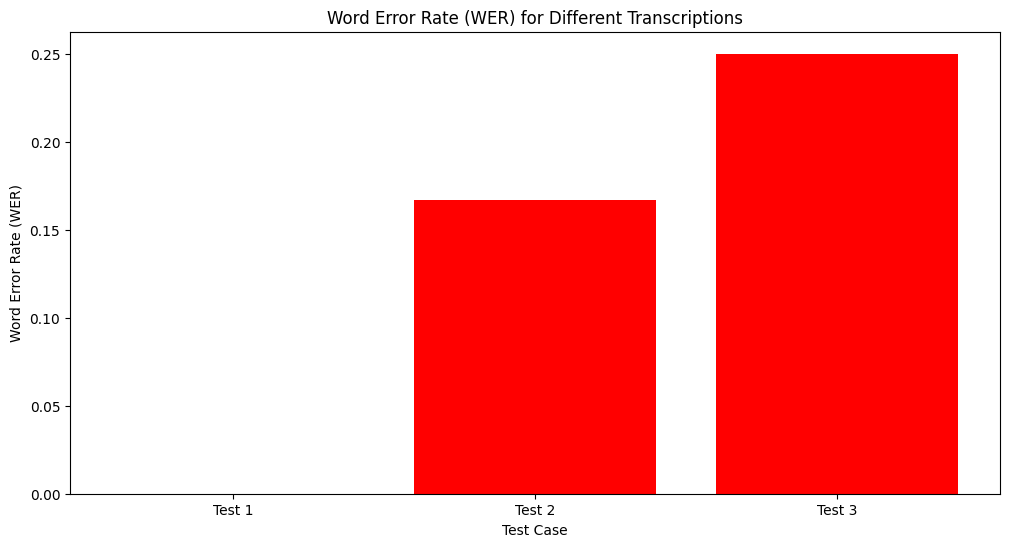

In [ ]:
#WER simulated data
import matplotlib.pyplot as plt
from jiwer import wer

# Assume these are the actual and predicted transcriptions for multiple test cases
actual_transcriptions = [
    "hello how are you",
    "i need help with my task",
    "please call me back"
]

predicted_transcriptions = [
    "hello how are you",
    "i need help with my cost",
    "please coll me back"
]

# Compute WER for each pair of actual and predicted transcriptions
wer_scores = [wer(act, pred) for act, pred in zip(actual_transcriptions, predicted_transcriptions)]

# Plot WER
plt.figure(figsize=(12, 6))
plt.bar(range(len(wer_scores)), wer_scores, color='red')
plt.xticks(range(len(wer_scores)), ['Test 1', 'Test 2', 'Test 3'])
plt.xlabel('Test Case')
plt.ylabel('Word Error Rate (WER)')
plt.title('Word Error Rate (WER) for Different Transcriptions')
plt.show()






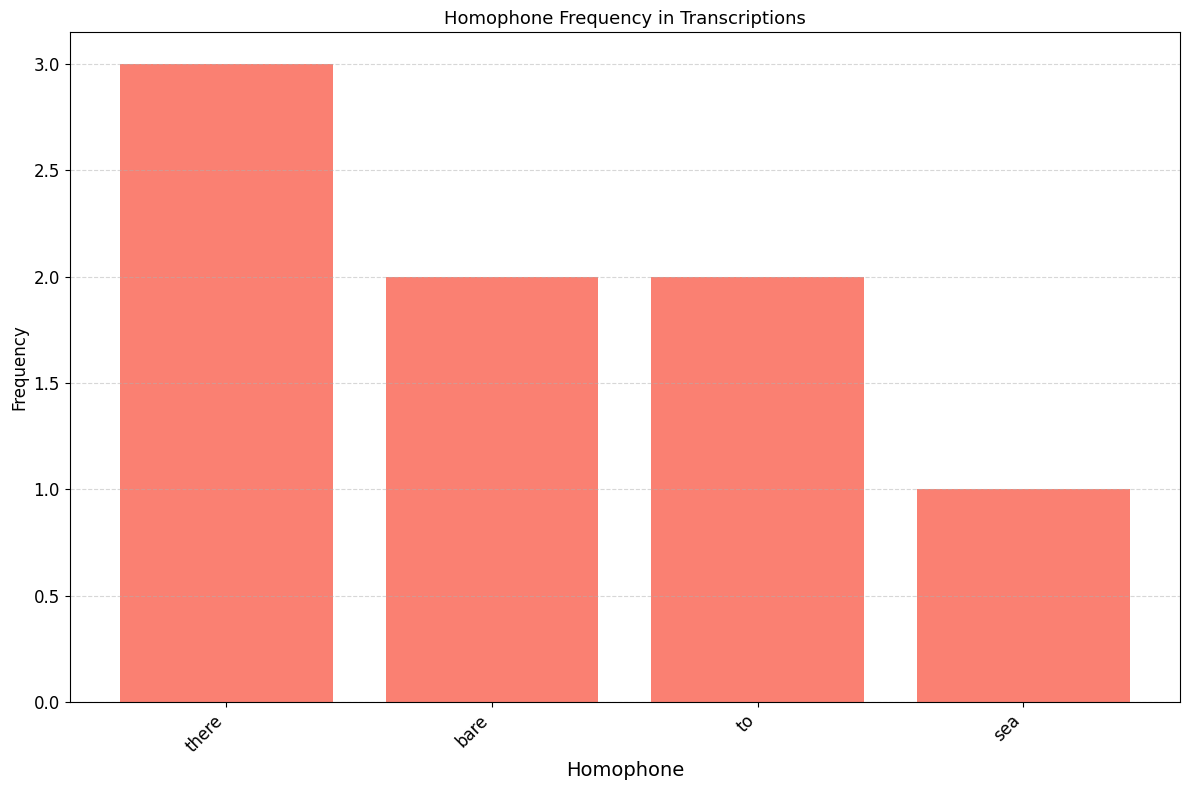

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Example set of homophones
homophones_dict = {
    "there": ["their", "they're", "there"],
    "were": ["where"],
    "to": ["too", "two"],
    "wait": ["weight"],
    "sea": ["see"],
    "bare": ["bear"]
}

# Function to count homophone occurrences in text
def count_homophones(text, homophones_dict):
    words = text.lower().split()  # Convert to lowercase for case-insensitive matching
    homophone_count = Counter()

    # Count homophone occurrences
    for word in words:
        for key, variants in homophones_dict.items():
            if word in variants:
                homophone_count[key] += 1
    return homophone_count

# Example transcriptions with varied occurrences of homophones
predicted_transcriptions = [
    "I went to the store and bought a right pen",
    "They went there to hear the music",
    "Write it down, it's their idea",
    "I see the bear by the sea",
    "They’re too late",
    "I saw the right way to bear the sea",
    "Their idea was too big"
]

# Count homophones in each transcription
homophone_counts = [count_homophones(transcription, homophones_dict) for transcription in predicted_transcriptions]

# Summarize total homophone counts
total_homophone_counts = Counter()
for count in homophone_counts:
    total_homophone_counts.update(count)

# Sort homophone counts for better visibility
sorted_homophone_counts = dict(sorted(total_homophone_counts.items(), key=lambda item: item[1], reverse=True))

# Plot homophone frequencies
plt.figure(figsize=(12, 8))
plt.bar(sorted_homophone_counts.keys(), sorted_homophone_counts.values(), color='salmon')

# Add labels and title
plt.xlabel('Homophone', fontsize=14)
plt.ylabel('Frequency', fontsize=12)
plt.title('Homophone Frequency in Transcriptions', fontsize=13)

# Increase font size for ticks and labels
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration
import torchaudio

# Load the Whisper model and processor
model_name = "openai/whisper-large"  # You can use 'base', 'small', etc. based on your resources
processor = WhisperProcessor.from_pretrained(model_name)
model = WhisperForConditionalGeneration.from_pretrained(model_name)

# Load your audio file
audio_path = "/content/Speaker26_000.wav"
waveform, sample_rate = torchaudio.load(audio_path)

# Print the shape of the waveform to debug
print("Original waveform shape:", waveform.shape)

# Convert to mono if stereo (Whisper expects a single channel)
if waveform.shape[0] > 1:
    waveform = waveform.mean(dim=0, keepdim=True)

# Print the shape of the waveform after conversion to mono
print("Waveform shape after conversion to mono:", waveform.shape)

# Resample if needed (Whisper expects 16kHz)
if sample_rate != 16000:
    resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)
    waveform = resampler(waveform)

# Print the shape of the waveform after resampling
print("Waveform shape after resampling:", waveform.shape)

# Process the audio to get input features for Whisper
input_features = processor(waveform.squeeze(), sampling_rate=16000, return_tensors="pt").input_features

# Ensure that no forced_decoder_ids are passed, and pass the attention mask if necessary
generated_ids = model.generate(input_features, language='en', attention_mask=None)  # Add attention_mask=None

# Decode the generated ids to text
transcription = processor.decode(generated_ids[0], skip_special_tokens=True)

# Print the transcription
print("Transcription:", transcription)



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.17G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.85k [00:00<?, ?B/s]

Original waveform shape: torch.Size([1, 1323008])
Waveform shape after conversion to mono: torch.Size([1, 1323008])
Waveform shape after resampling: torch.Size([1, 960006])


You have passed language=en, but also have set `forced_decoder_ids` to [[1, None], [2, 50359]] which creates a conflict. `forced_decoder_ids` will be ignored in favor of language=en.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Transcription:  The Goose with the Golden Eggs A certain man had the good fortune to possess a goose that laid him a golden egg every day, but dissatisfied with so slow an income,
